# DSEM 6105 Project

# E-Commerce Shipping

Predicting the timely delivery of e-commerce orders using the different ML techniques learned in DSEM 6105

Dataset used - https://www.kaggle.com/datasets/prachi13/customer-analytics?resource=download

Contents:
1. Module Imports
2. Reading Data into the Notebook
3. Data Pre-processing
4. Seperating numerical and categorical values
5. Handling Numerical Values - Scaling and Standardization
6. Handling Categorical Values - Integer and One Hot Encoding


7. <b>RandomForest</b>
- 7.1 RandomForest with Hyper paramter Tuning
- 7.2 RandomForest with Feature selection
- 7.3 RandomForest with Hyper paramter Tuning and Feature selection
8. <b>XGBOOST</b>
- 8.1 XGBOOST with Hyper paramter Tuning using RandomizedSearchCV
- 8.2 XGBOOST with Feature selection
- 8.3 XGBOOST with Hyper paramter Tuning and Feature selection
9. <b>KNN</b>
- 9.1 KNN with Hyper paramter Tuning using RandomizedSearchCV
10. <b>Decision Tree</b>
- 10.1 Decision Tree with Hyper paramter Tuning using RandomizedSearchCV
- 10.2 Decision Tree with Feature selection
- 10.3 Decision Tree with Hyper paramter Tuning and Feature selection
11. <b>Logistic Regression</b>
- 11.1 Logistic Regression with Hyper paramter Tuning using RandomizedSearchCV
- 11.2 Logistic Regression with Feature selection
- 11.2 Logistic Regression with Hyper paramter Tuning with Feature selection

# Module Imports

In [332]:
'''Importing necessary packages'''
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# Reading Data into the Notebook

In [333]:
# Read data
df = pd.read_csv("C:/Users/Harsh/Downloads/archive (1)/Train.csv")
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


# Data Pre-processing

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [335]:
# describe Statistical Data
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [336]:
#Viewing column names
df.columns 

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [337]:
# Feature engineering
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [338]:
df["Reached.on.Time_Y.N"]

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [339]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [340]:
#Checking for null values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ID,0,0.0
Warehouse_block,0,0.0
Mode_of_Shipment,0,0.0
Customer_care_calls,0,0.0
Customer_rating,0,0.0
Cost_of_the_Product,0,0.0
Prior_purchases,0,0.0
Product_importance,0,0.0
Gender,0,0.0
Discount_offered,0,0.0


From the above table it can be seen that we do not require to replace null values since our dataset is clean and free from NaN values

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

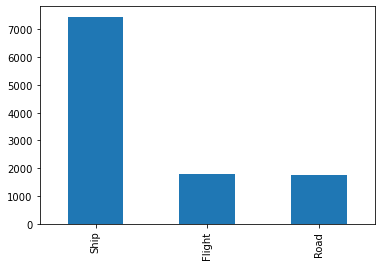

In [341]:
#Distribution across diffrent modes of shipment
shipm=df['Mode_of_Shipment'].value_counts()
shipm.head(10).plot.bar()
shipm.head(20)

F    5545
M    5454
Name: Gender, dtype: int64

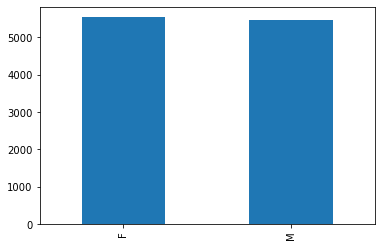

In [342]:
#Distribution of e-commerce orders by genders
gen=df['Gender'].value_counts()
gen.head(10).plot.bar()
gen.head(20)

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

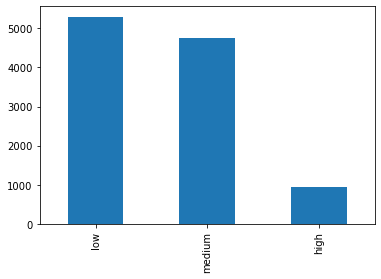

In [343]:
#The categorization of orders by product importance
prod=df['Product_importance'].value_counts()
prod.head(10).plot.bar()
prod.head(20)

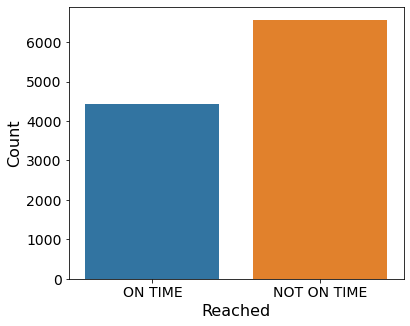

In [344]:
#Visualizing on time vs not on time delivery 
fig_dims = (6,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(df['Reached.on.Time_Y.N'],ax=ax)
g.set_xticklabels(['ON TIME','NOT ON TIME'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Reached',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

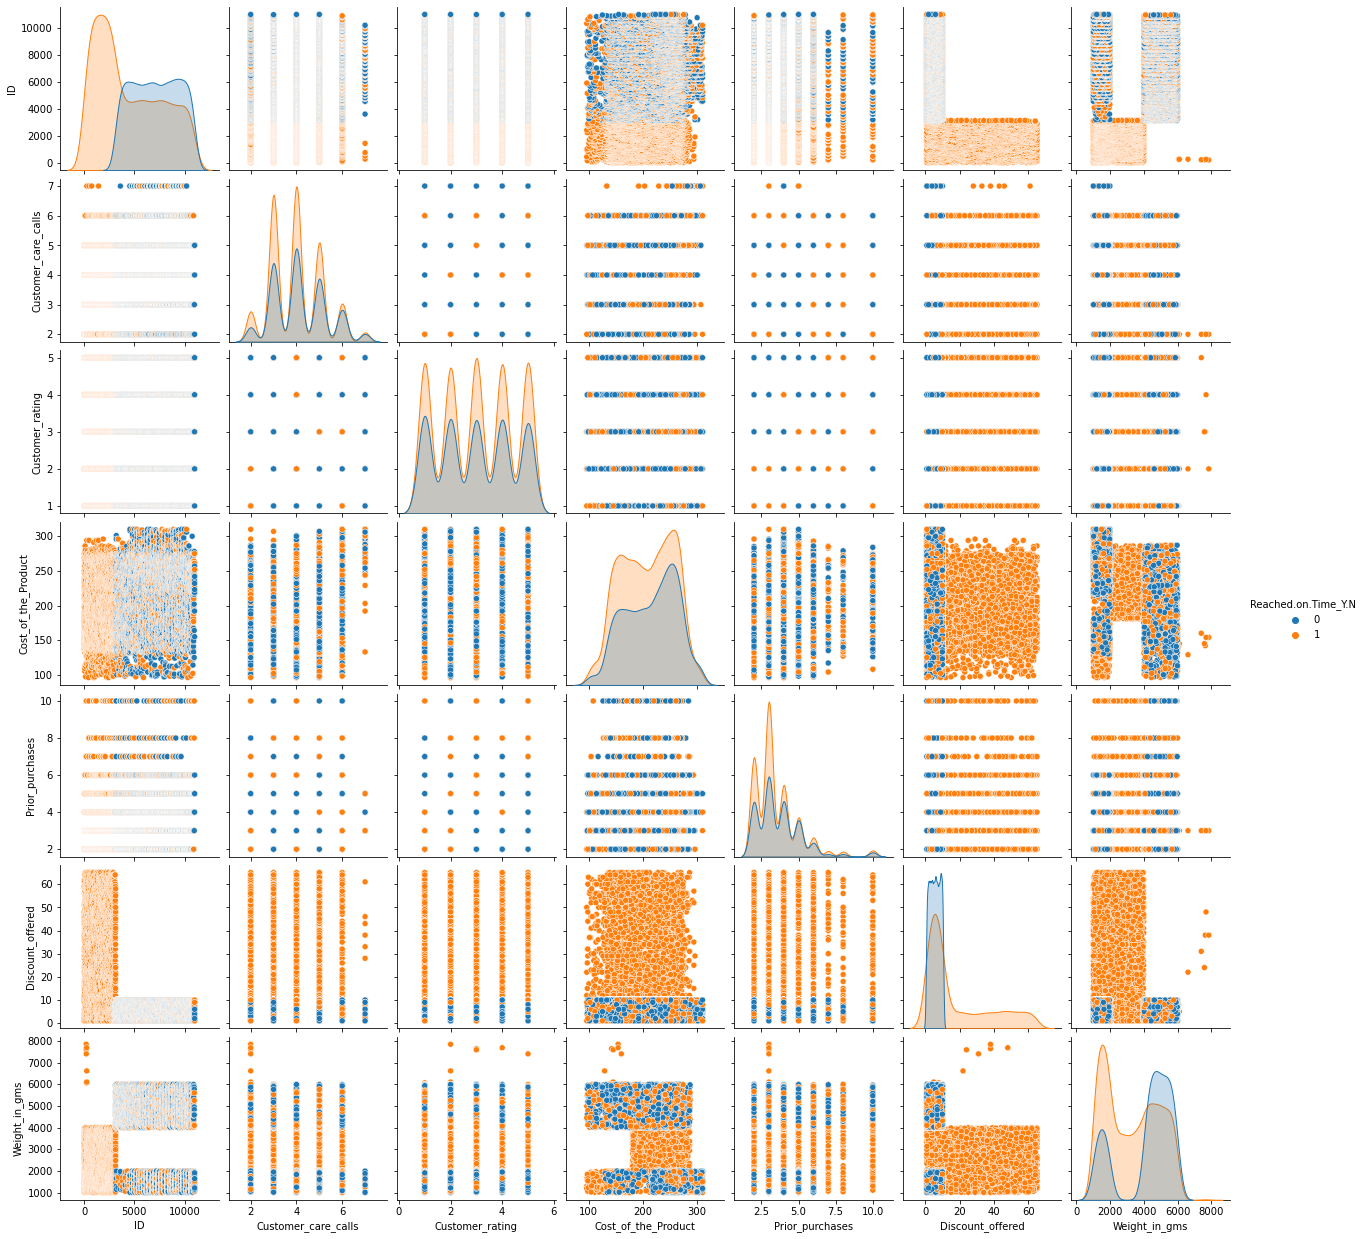

In [345]:
# Pair wise relationship with reached on time column(the Y variable)
sns.pairplot(df,hue="Reached.on.Time_Y.N")

# Seperating numerical and categorical values

In [346]:
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [347]:
df2 = df.copy()
print(f'Number of rows before filtering outliers: {len(df2)}')

filtered_entries1 = np.array([True] * len(df2))

for col in nums:
    zscore = abs(stats.zscore(df2[col])) # calculate absolute z-score
    filtered_entries1 = (zscore < 3) & filtered_entries1 # keep less than 3 absolute z-score
    
df2 = df2[filtered_entries1] # filter, only take the z-score for below 3

print(f'Number of rows after filtering outliers: {len(df2)}')

Number of rows before filtering outliers: 10999
Number of rows after filtering outliers: 10642


# Handling Numerical Values - Scaling and Standardization

Some algorithms are sensitive to feature scaling hence to prevent higher weightage being given to features with higher magnitude we use scaling
Standardization or Z-Score Normalization is the scaling of features by subtracting from mean and dividing by standard deviation

In [348]:
#We scale and standardize the numerical columns to ensure weightage is not biased by magnitude

#Scaling
df2['Customer_rating'] = MinMaxScaler().fit_transform(df2['Customer_rating'].values.reshape(len(df2), 1))

#Standardization :
df2['Customer_care_calls'] = StandardScaler().fit_transform(df2['Customer_care_calls'].values.reshape(len(df2), 1))
df2['Cost_of_the_Product'] = StandardScaler().fit_transform(df2['Cost_of_the_Product'].values.reshape(len(df2), 1))
df2['Prior_purchases'] = StandardScaler().fit_transform(df2['Prior_purchases'].values.reshape(len(df2), 1))
df2['Discount_offered'] = StandardScaler().fit_transform(df2['Discount_offered'].values.reshape(len(df2), 1))
df2['Weight_in_gms'] = StandardScaler().fit_transform(df2['Weight_in_gms'].values.reshape(len(df2), 1))

In [349]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10642 non-null  int64  
 1   Warehouse_block      10642 non-null  object 
 2   Mode_of_Shipment     10642 non-null  object 
 3   Customer_care_calls  10642 non-null  float64
 4   Customer_rating      10642 non-null  float64
 5   Cost_of_the_Product  10642 non-null  float64
 6   Prior_purchases      10642 non-null  float64
 7   Product_importance   10642 non-null  object 
 8   Gender               10642 non-null  object 
 9   Discount_offered     10642 non-null  float64
 10  Weight_in_gms        10642 non-null  float64
 11  Reached.on.Time_Y.N  10642 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [350]:
df2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10642.000000,1.064200e+04,10642.000000,1.064200e+04,1.064200e+04,1.064200e+04,1.064200e+04,10642.000000
mean,5570.347773,6.986956e-15,0.497298,5.756426e-16,-6.094584e-15,2.935728e-14,1.339529e-17,0.590303
std,3159.806013,1.000047e+00,0.353086,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,0.491801
min,1.000000,-1.803627e+00,0.000000,-2.383302e+00,-1.135516e+00,-7.689960e-01,-1.613343e+00,0.000000
25%,2881.250000,-9.304889e-01,0.250000,-8.440579e-01,-3.595969e-01,-5.688870e-01,-1.103516e+00,0.000000
50%,5604.500000,-5.735048e-02,0.500000,9.196863e-02,-3.595969e-01,-3.687781e-01,3.204627e-01,1.000000
75%,8300.750000,8.157880e-01,0.750000,8.407899e-01,4.163217e-01,-1.686692e-01,8.642883e-01,1.000000
max,10999.000000,2.562065e+00,1.000000,2.068025e+00,3.519996e+00,3.233183e+00,2.561018e+00,1.000000


In [351]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10642 non-null  int64  
 1   Warehouse_block      10642 non-null  object 
 2   Mode_of_Shipment     10642 non-null  object 
 3   Customer_care_calls  10642 non-null  float64
 4   Customer_rating      10642 non-null  float64
 5   Cost_of_the_Product  10642 non-null  float64
 6   Prior_purchases      10642 non-null  float64
 7   Product_importance   10642 non-null  object 
 8   Gender               10642 non-null  object 
 9   Discount_offered     10642 non-null  float64
 10  Weight_in_gms        10642 non-null  float64
 11  Reached.on.Time_Y.N  10642 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


# Handling Categorical Values - Integer and One Hot Encoding

In [352]:
#Many machine learning algorithms cannot operate on label data directly. 
#They require all input variables and output variables to be numeric.

# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df2['Product_importance'] = df2['Product_importance'].map(mapping_Product_importance)
df2['Gender'] = df2['Gender'].map(mapping_Gender)

In [353]:
#One-Hot Encoding
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df2[cat], prefix=cat)
    df2 = df2.join(onehots)

In [354]:
#We can observe that the data type of our columns has now been converted
#All object data type has been converted (categorical values to numerical values)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10642 non-null  int64  
 1   Warehouse_block          10642 non-null  object 
 2   Mode_of_Shipment         10642 non-null  object 
 3   Customer_care_calls      10642 non-null  float64
 4   Customer_rating          10642 non-null  float64
 5   Cost_of_the_Product      10642 non-null  float64
 6   Prior_purchases          10642 non-null  float64
 7   Product_importance       10642 non-null  int64  
 8   Gender                   10642 non-null  int64  
 9   Discount_offered         10642 non-null  float64
 10  Weight_in_gms            10642 non-null  float64
 11  Reached.on.Time_Y.N      10642 non-null  int64  
 12  Mode_of_Shipment_Flight  10642 non-null  uint8  
 13  Mode_of_Shipment_Road    10642 non-null  uint8  
 14  Mode_of_Shipment_Ship 

In [355]:
#Excessive columns can be removed since they have been encoded now
df2 = df2.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [356]:
df2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
count,10642.000000,1.064200e+04,10642.000000,1.064200e+04,1.064200e+04,10642.000000,10642.000000,1.064200e+04,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,5570.347773,6.986956e-15,0.497298,5.756426e-16,-6.094584e-15,0.596786,0.496711,2.935728e-14,1.339529e-17,0.590303,0.162375,0.160026,0.677598,0.166980,0.167074,0.166416,0.166980,0.332550
std,3159.806013,1.000047e+00,0.353086,1.000047e+00,1.000047e+00,0.637518,0.500013,1.000047e+00,1.000047e+00,0.491801,0.368812,0.366648,0.467418,0.372975,0.373059,0.372471,0.372975,0.471149
min,1.000000,-1.803627e+00,0.000000,-2.383302e+00,-1.135516e+00,0.000000,0.000000,-7.689960e-01,-1.613343e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2881.250000,-9.304889e-01,0.250000,-8.440579e-01,-3.595969e-01,0.000000,0.000000,-5.688870e-01,-1.103516e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5604.500000,-5.735048e-02,0.500000,9.196863e-02,-3.595969e-01,1.000000,0.000000,-3.687781e-01,3.204627e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8300.750000,8.157880e-01,0.750000,8.407899e-01,4.163217e-01,1.000000,1.000000,-1.686692e-01,8.642883e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10999.000000,2.562065e+00,1.000000,2.068025e+00,3.519996e+00,2.000000,1.000000,3.233183e+00,2.561018e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [357]:
# We export the clean and transformed data to be further used to evaluate model performances
df2.to_csv('data_clean.csv', index=False)

# RandomForest

In [358]:
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.2f' % accuracy_score(ytest, pred))
    print('Precision : %.2f' % precision_score(ytest, pred))
    print('Recall : %.2f' % recall_score(ytest, pred))
    print('F-1Score : %.2f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.2f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.2f'% average_precision)

In [359]:
# Feature Importance Function
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

# Best Hyperparameter Function
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [360]:
X = df2.drop(columns = ['ID','Reached.on.Time_Y.N','Customer_care_calls', 'Customer_rating'])
y = df2['Reached.on.Time_Y.N']

In [361]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import validation_curve

# Splitting dataset into train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

Accuracy : 0.65
Precision : 0.72
Recall : 0.67
F-1Score : 0.69
ROC AUC : 0.65
AP : 0.68


In [362]:
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(6384, 14) (2129, 14) (6384,) (2129,) (2129, 14) (2129,)


In [363]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  1.0
test Accuracy :  0.6505401596993894


In [364]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6416157820573039

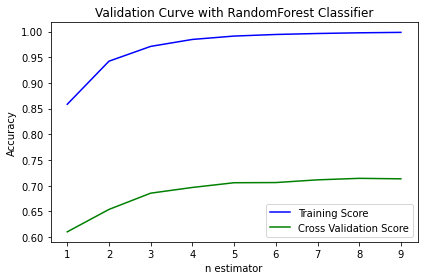

In [365]:
# Hyperparameter Tuning Random Forest
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 42),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'roc_auc') 


# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [366]:
# Evaluation Metrics
model = RandomForestClassifier(random_state = 42, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)

Accuracy : 0.61
Precision : 0.62
Recall : 0.86
F-1Score : 0.72
ROC AUC : 0.56
AP : 0.62


In [367]:
# Model Prediction
prediction_train = model.predict(X_train)
prediction_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [368]:
# Model Validation Average Precision
print('AP train: ',average_precision_score(y_train, prediction_train))
print('AP test: ',average_precision_score(y_test, prediction))

AP train:  0.6306180693979828
AP test:  0.6182219846739451


In [369]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.6296992481203008
test Accuracy :  0.6120244246124942


In [370]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6218882104274307

Text(0.5, 1.0, 'feature importance score')

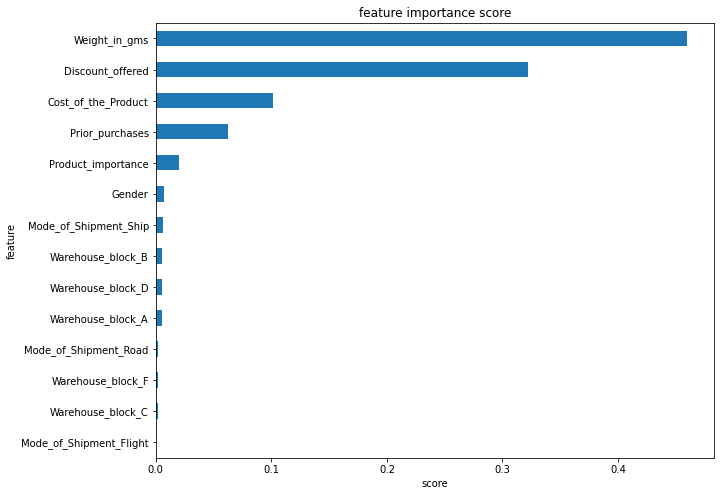

In [371]:
#plt.figsize(10, 8)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [372]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls','Customer_rating','Gender','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C', 'Warehouse_block_F', 'Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Warehouse_block_D','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label
# Evaluation Metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

Accuracy : 0.66
Precision : 0.73
Recall : 0.66
F-1Score : 0.70
ROC AUC : 0.66
AP : 0.68


In [373]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.9998433583959899
test Accuracy :  0.6580554250821982


In [374]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6444340065758573

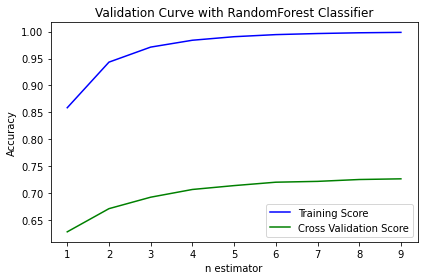

In [375]:
# Hyperparameter Tuning Random Forest
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 42),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'roc_auc') 


# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [376]:
# Evaluation Metrics
model = RandomForestClassifier(random_state = 42, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)

Accuracy : 0.69
Precision : 0.88
Recall : 0.54
F-1Score : 0.67
ROC AUC : 0.72
AP : 0.75


In [377]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.6799812030075187
test Accuracy :  0.687646782527008


In [378]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6712071395021136

Text(0.5, 1.0, 'feature importance score')

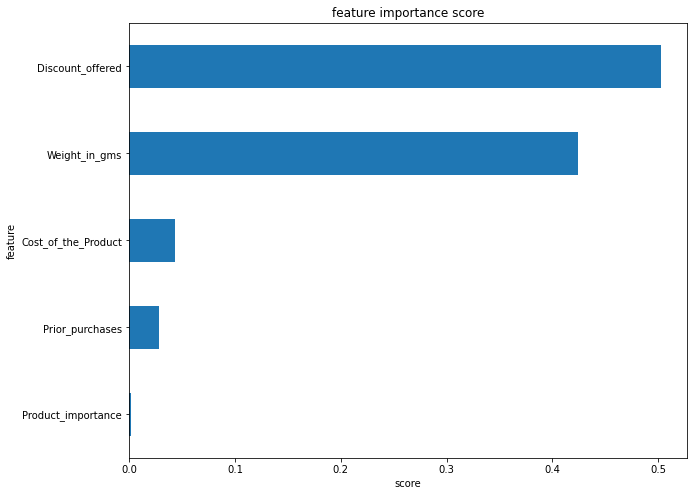

In [379]:
#plt.figsize(10, 8)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# XGBOOST

In [380]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label what we think positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(15, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [381]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls', 'Customer_rating','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train, Test and validation
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.72
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
AUC: 0.65


In [382]:
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(6384, 14) (2129, 14) (6384,) (2129,) (2129, 14) (2129,)


In [383]:
# Model Test Accuracy
print('train Accuracy : ', xg.score(X_train, y_train))
print('test Accuracy : ', xg.score(X_test, y_test))

train Accuracy :  0.9100877192982456
test Accuracy :  0.6533583842179427


In [384]:
# Model Validation Accuracy
y_prd = xg.predict(X_val)
accuracy_score(y_val,y_prd)

0.6416157820573039

In [385]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#make into shape dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 9)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned1 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned1.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned1.predict(X_test)
eval_classification(xg_tuned1, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.74
Recall (Test Set): 0.64
F1-Score (Test Set): 0.69
AUC: 0.66


In [386]:
# Model Test Accuracy
print('train Accuracy : ', xg_tuned1.score(X_train, y_train))
print('test Accuracy : ', xg_tuned1.score(X_test, y_test))

train Accuracy :  0.832639217502108
test Accuracy :  0.7439127828371725


In [387]:
# Model Validation Accuracy
y_prd = xg_tuned1.predict(X_val)
accuracy_score(y_val,y_prd)

0.6514795678722405

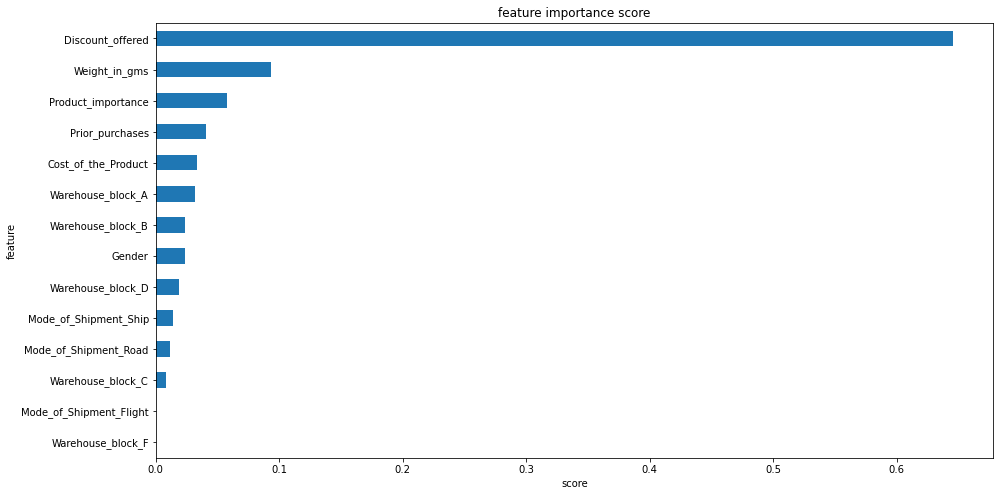

In [388]:
show_feature_importance(xg_tuned1.best_estimator_)

In [389]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls','Customer_rating','Gender','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C', 'Warehouse_block_F', 'Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Warehouse_block_D','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train, Test and validation
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.73
Recall (Test Set): 0.66
F1-Score (Test Set): 0.69
AUC: 0.65


In [390]:
# Model Test Accuracy
print('train Accuracy : ', xg.score(X_train, y_train))
print('test Accuracy : ', xg.score(X_test, y_test))

train Accuracy :  0.8917606516290727
test Accuracy :  0.6552372005636449


In [391]:
# Model Validation Accuracy
y_prd = xg.predict(X_val)
accuracy_score(y_val,y_prd)

0.6528886801315171

In [392]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#make into shape dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 9)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned2 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned2.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned2.predict(X_test)#Check performance from model
eval_classification(xg_tuned2, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.80
Recall (Test Set): 0.58
F1-Score (Test Set): 0.67
AUC: 0.69


In [393]:
# Model Test Accuracy
print('train Accuracy : ', xg_tuned2.score(X_train, y_train))
print('test Accuracy : ', xg_tuned2.score(X_test, y_test))

train Accuracy :  0.8222027270929831
test Accuracy :  0.7354422445491551


In [394]:
# Model Validation Accuracy
y_prd = xg_tuned2.predict(X_val)
accuracy_score(y_val,y_prd)

0.6665100986378582

In [395]:
y_pred=xg_tuned2.predict(X_test)
rec, fall_out, thresholds = roc_curve(y_test,y_pred)

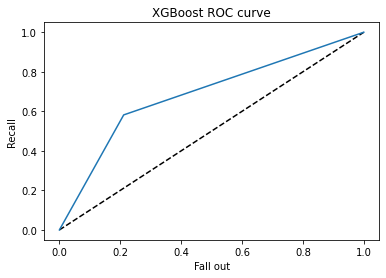

In [396]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='XGBoost')
plt.xlabel('Fall out')
plt.ylabel('Recall')
plt.title('XGBoost ROC curve')
plt.show()

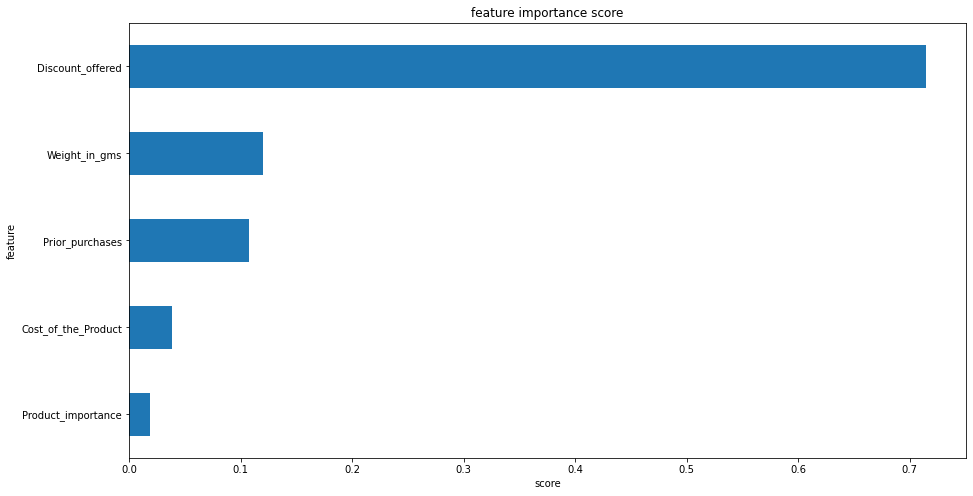

In [397]:
show_feature_importance(xg_tuned2.best_estimator_)

# KNN

In [398]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label what we think positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [399]:
# Split Feature and Label
X = df2.drop(columns=['ID', 'Reached.on.Time_Y.N', 'Customer_care_calls', 'Customer_rating'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting dataset into train, test and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [400]:
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(6384, 14) (2129, 14) (6384,) (2129,) (2129, 14) (2129,)


In [401]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [402]:
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.69
Recall (Test Set): 0.67
F1-Score (Test Set): 0.68
AUC: 0.62


In [403]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.7756892230576441
test Accuracy :  0.624706434945984


In [404]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6434945984030062

# Tune Hyperparameter with RandomSearch

In [405]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(2,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.77
Recall (Test Set): 0.60
F1-Score (Test Set): 0.67
AUC: 0.67


In [406]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.7794323901632728
test Accuracy :  0.7381599230340334


In [407]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6524189760450916

In [408]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)

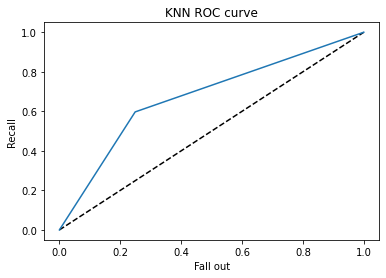

In [409]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='KNN')
plt.xlabel('Fall out')
plt.ylabel('Recall')
plt.title('KNN ROC curve')
plt.show()

In [410]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 28
Best p: 2
Best algorithm: brute


# Decision Tree

In [411]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting dataset into train, test and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [412]:
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(6384, 16) (2129, 16) (6384,) (2129,) (2129, 16) (2129,)


In [413]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.68
Recall (Test Set): 0.71
F1-Score (Test Set): 0.69
AUC: 0.62


In [414]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  1.0
test Accuracy :  0.6326914044152184


In [415]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.642555190230155

**Tune Hyperparameter with RandomSearch**

In [416]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Initialization Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performance from model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.71
Recall (Test Set): 0.69
F1-Score (Test Set): 0.70
AUC: 0.64


In [417]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 34
Best min_samples_split: 10
Best min_samples_leaf: 10
Best max_features: auto
Best criterion: entropy
Best splitter: best


In [418]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.8591942434926959
test Accuracy :  0.7358973167594122


In [419]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.642555190230155

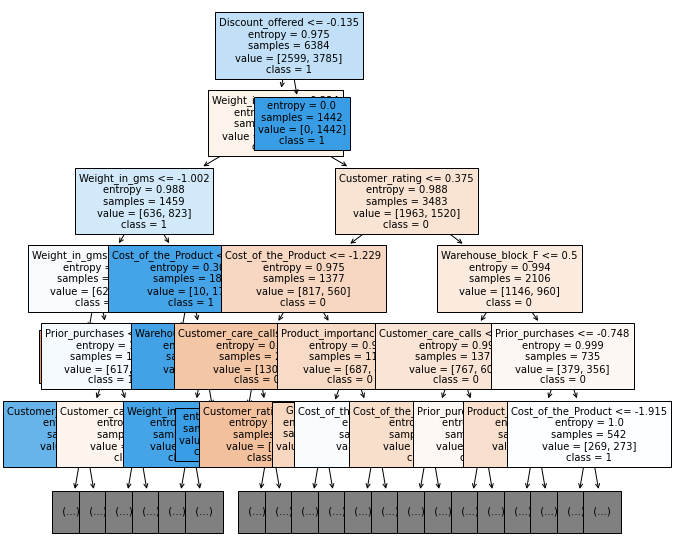

In [420]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

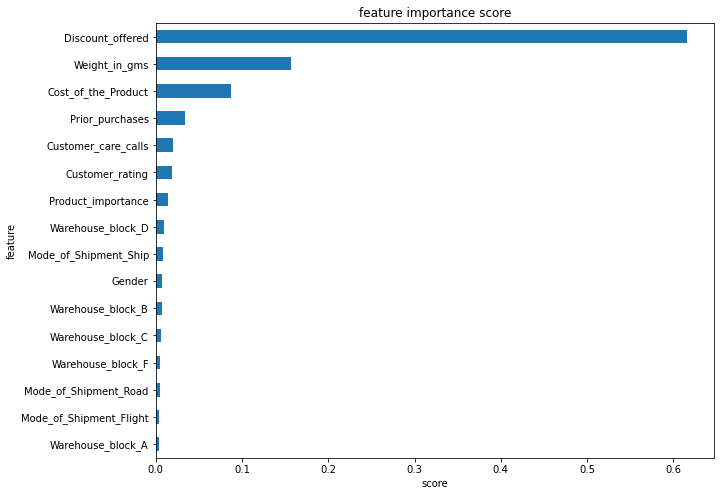

In [421]:
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [422]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10642 non-null  int64  
 1   Customer_care_calls      10642 non-null  float64
 2   Customer_rating          10642 non-null  float64
 3   Cost_of_the_Product      10642 non-null  float64
 4   Prior_purchases          10642 non-null  float64
 5   Product_importance       10642 non-null  int64  
 6   Gender                   10642 non-null  int64  
 7   Discount_offered         10642 non-null  float64
 8   Weight_in_gms            10642 non-null  float64
 9   Reached.on.Time_Y.N      10642 non-null  int64  
 10  Mode_of_Shipment_Flight  10642 non-null  uint8  
 11  Mode_of_Shipment_Road    10642 non-null  uint8  
 12  Mode_of_Shipment_Ship    10642 non-null  uint8  
 13  Warehouse_block_A        10642 non-null  uint8  
 14  Warehouse_block_B     

**with feature selection**

In [423]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N','Customer_care_calls','Customer_rating','Product_importance','Gender','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting dataset into train, test and validation data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [424]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.70
Recall (Test Set): 0.71
F1-Score (Test Set): 0.71
AUC: 0.64


In [425]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.9998433583959899
test Accuracy :  0.6557069046500704


In [426]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6557069046500704

Overfit again

In [427]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Model Initialization
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performance from model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.71
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
AUC: 0.64


In [428]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.868029518517182
test Accuracy :  0.7279351474269972


In [429]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6491310474401127

In [430]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)

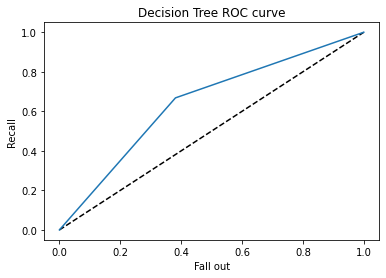

In [431]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Decision Tree')
plt.xlabel('Fall out')
plt.ylabel('Recall')
plt.title('Decision Tree ROC curve')
plt.show()

In [432]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 34
Best min_samples_split: 10
Best min_samples_leaf: 10
Best max_features: auto
Best criterion: entropy
Best splitter: best


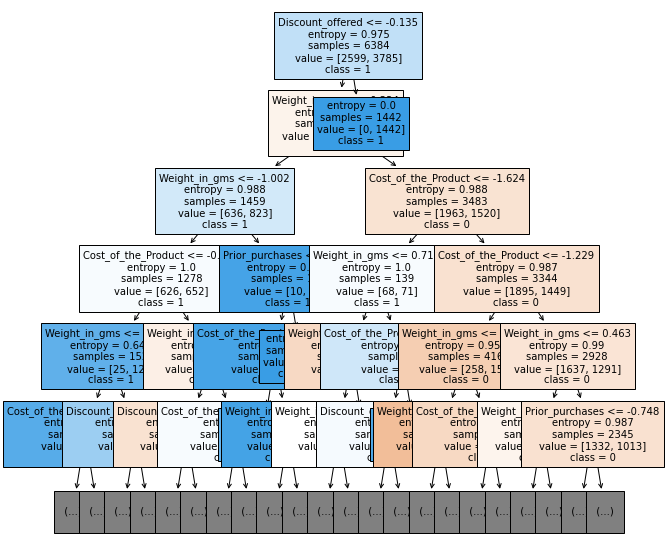

In [433]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

# Logistic Regression

In [434]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting dataset into train, test and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [435]:
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(6384, 16) (2129, 16) (6384,) (2129,) (2129, 16) (2129,)


In [436]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.68
Recall (Test Set): 0.68
F1-Score (Test Set): 0.68
AUC: 0.61


In [437]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.6350250626566416
test Accuracy :  0.624706434945984


In [438]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6322217003287929

**try with Hyperparameter**

In [439]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters which will be tested
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C , solver=solver)

#  Model Initialization
logres = LogisticRegression(random_state=42) # Init achieve with Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.59
Recall (Test Set): 1.00
F1-Score (Test Set): 0.74
AUC: 0.50


In [440]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

Best algorithm: l2
Best C: 0.0001
Best solver: saga


In [441]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.7177576173744296
test Accuracy :  0.7225152784003324


In [442]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.5843118835133866

Text(0.5, 1.0, 'feature importance score')

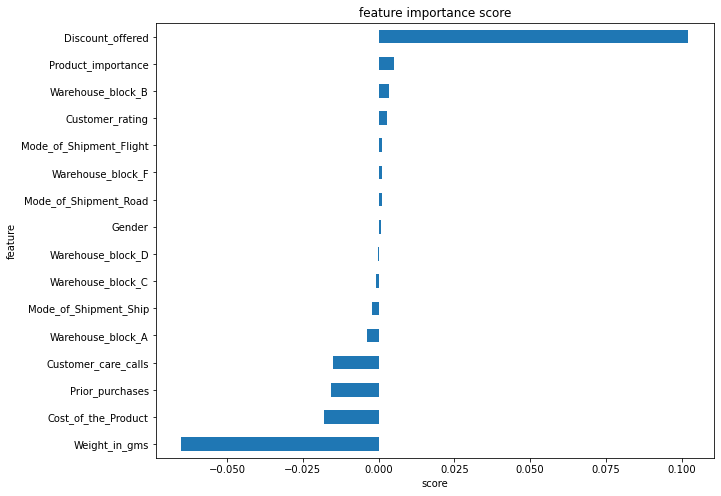

In [443]:
feat_importances = pd.Series(model.best_estimator_.coef_[0], index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [444]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10642 non-null  int64  
 1   Customer_care_calls      10642 non-null  float64
 2   Customer_rating          10642 non-null  float64
 3   Cost_of_the_Product      10642 non-null  float64
 4   Prior_purchases          10642 non-null  float64
 5   Product_importance       10642 non-null  int64  
 6   Gender                   10642 non-null  int64  
 7   Discount_offered         10642 non-null  float64
 8   Weight_in_gms            10642 non-null  float64
 9   Reached.on.Time_Y.N      10642 non-null  int64  
 10  Mode_of_Shipment_Flight  10642 non-null  uint8  
 11  Mode_of_Shipment_Road    10642 non-null  uint8  
 12  Mode_of_Shipment_Ship    10642 non-null  uint8  
 13  Warehouse_block_A        10642 non-null  uint8  
 14  Warehouse_block_B     

Features to be used:

* discount_offered, (6)
* Weight_in_gms, (7)
* Prior_purchases, (3)
* Cost_of_the_Product (2)

**with feature selection**

In [445]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N','Customer_care_calls','Customer_rating','Product_importance','Gender','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting dataset into train, test and validation data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [446]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.68
Recall (Test Set): 0.68
F1-Score (Test Set): 0.68
AUC: 0.62


In [447]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.631578947368421
test Accuracy :  0.6279943635509629


In [448]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.6261155472052606

In [449]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters which will be tested
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C , solver=solver)

# Model Initialization
logres = LogisticRegression(random_state=42) # Init achieve with Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.59
Recall (Test Set): 1.00
F1-Score (Test Set): 0.74
AUC: 0.50


In [450]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)

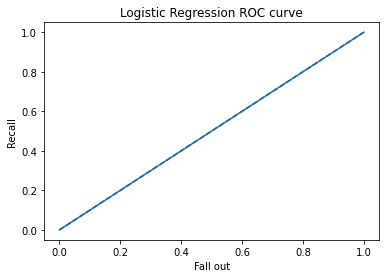

In [451]:
rec, fall_out, thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='Logistic Regression')
plt.xlabel('Fall out')
plt.ylabel('Recall')
plt.title('Logistic Regression ROC curve')
plt.show()

In [452]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

Best algorithm: l2
Best C: 0.0001
Best solver: sag


In [453]:
# Model Test Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.7170306331619265
test Accuracy :  0.7227066000502902


In [454]:
# Model Validation Accuracy
y_prd = model.predict(X_val)
accuracy_score(y_val,y_prd)

0.5843118835133866